# 🚨 911 Calls Data Analysis
An exploratory data analysis (EDA) project on emergency 911 call data from Montgomery County, Pennsylvania.
Data Set can be found at: https://www.kaggle.com/datasets/mchirico/montcoalert

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('911.csv')

In [3]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
#checking the head of the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Top five zipcodes for 911 calls:**

In [5]:
df['zip'].value_counts().sort_values(ascending=False).head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

**Top five townships (twp) for 911 calls:**

In [6]:
df['twp'].value_counts().sort_values(ascending=False).head(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

**Number of unique title codes:** 

In [7]:
df['title'].nunique()

148

**Creating a new Column "reason":**

In [8]:
df['reason']=df['title'].str.split(':').str[0]
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire


**Most common Reason for a 911 call based off of this new column:**

In [9]:
df.groupby('reason')['reason'].count().sort_values(ascending=False).head(1)

reason
EMS    332692
Name: reason, dtype: int64

**Creating a Countplot by reason:**

<Axes: xlabel='reason', ylabel='count'>

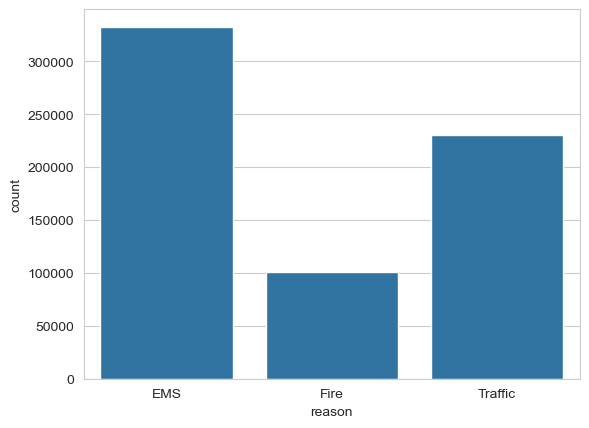

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='reason',data=df)

In [11]:
#data type of the objects in the timeStamp column
df['timeStamp'].dtype

dtype('O')

In [12]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])  #changing data type from string to date time
df['timeStamp'].dtype

dtype('<M8[ns]')

In [13]:
#testing the timeStamp
df['timeStamp'].iloc[0].hour

17

**Creating new columns: hour, month, and dow:** 

In [14]:
df['hour']=df['timeStamp'].dt.hour
df['month']=df['timeStamp'].dt.month
df['dow']=df['timeStamp'].dt.day_name()
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dow
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wednesday
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wednesday
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wednesday
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wednesday


**creating a countplot of the Day of Week column with the hue based off of the Reason column:**

<Axes: xlabel='dow', ylabel='count'>

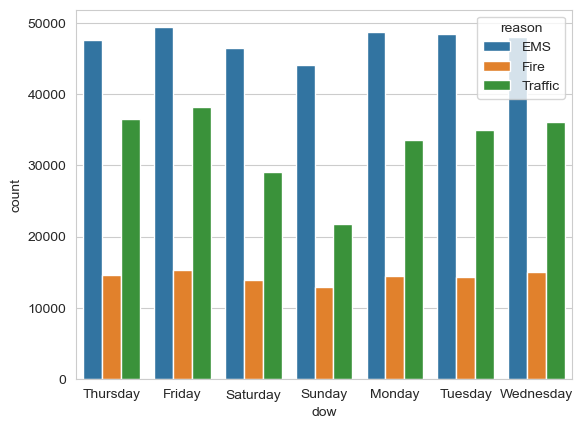

In [15]:
sns.countplot(x='dow',hue='reason',data=df)

**Doing the same for Month:**

<Axes: xlabel='month', ylabel='count'>

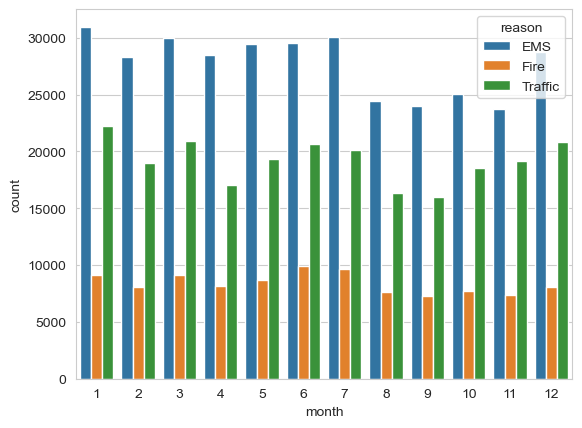

In [16]:
sns.countplot(x='month',hue='reason',data=df)

**Create a simple plot off of the dataframe indicating the count of calls per month:**

In [17]:
byMonth=df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dow
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<Axes: xlabel='month'>

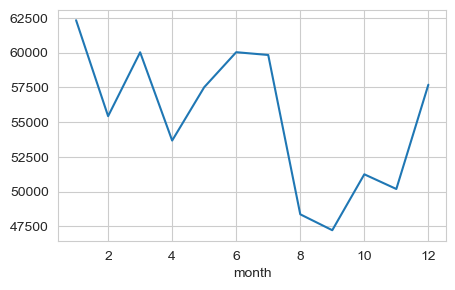

In [18]:
byMonth['title'].plot.line(figsize=(5,3))

**Creating a linear fit on the number of calls per month:**

In [19]:
byMonth.reset_index(inplace=True) #as seaborn can't plot index

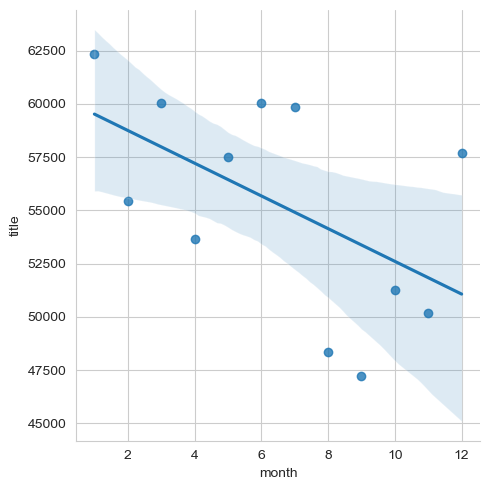

In [20]:
sns.lmplot(x='month',y='title',data=byMonth)

In [21]:
# Adding a new column 'date' to the df dataframe
df['date']=df['timeStamp'].dt.date

In [22]:
byDate=df.groupby('date').count()

In [23]:
byDate.reset_index(inplace=True)

**Creating a plot of counts of 911 calls per date (For Jan 2019):**

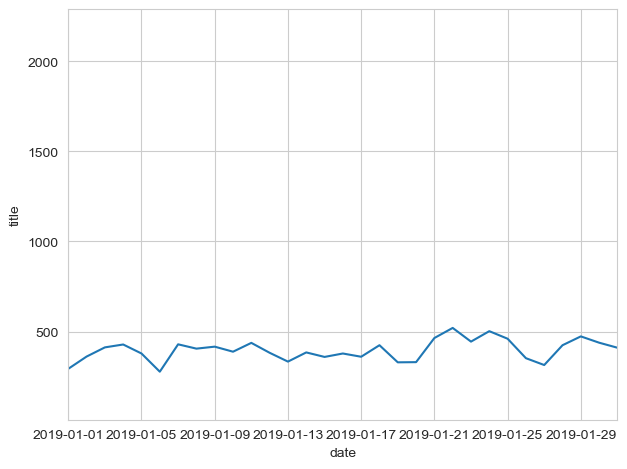

In [24]:
sns.lineplot(x='date',y='title',data=byDate)
plt.xlim([pd.Timestamp('2019-01-01'),pd.Timestamp('2019-01-31')])
plt.tight_layout()

**Recreate the plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [25]:
reasonDf=df.groupby(['reason','date']).count().reset_index()
reasonDf.head()

,reason,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,month,dow
0,EMS,2015-12-10,58,58,58,53,58,58,58,58,58,58,58,58
1,EMS,2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186
2,EMS,2015-12-12,188,188,188,170,188,188,188,188,188,188,188,188
3,EMS,2015-12-13,191,191,191,179,191,191,191,191,191,191,191,191
4,EMS,2015-12-14,221,221,221,200,221,221,221,221,221,221,221,221


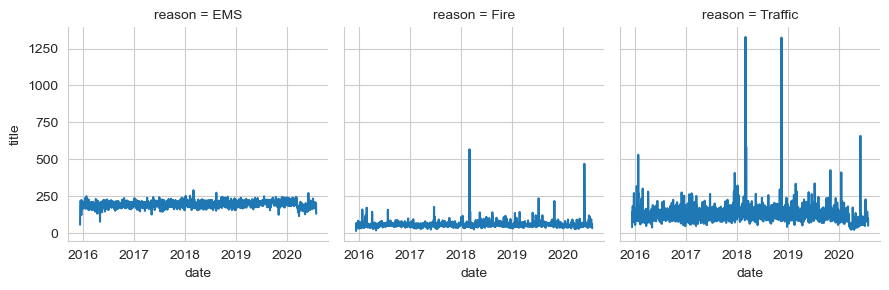

In [26]:
g=sns.FacetGrid(col='reason',data=reasonDf)
g.map(sns.lineplot,'date','title')

**Hours vs Days of Week:**

In [27]:
day_hour=df.pivot_table(index='dow',columns='hour',values='title',aggfunc='count')

<Axes: xlabel='hour', ylabel='dow'>

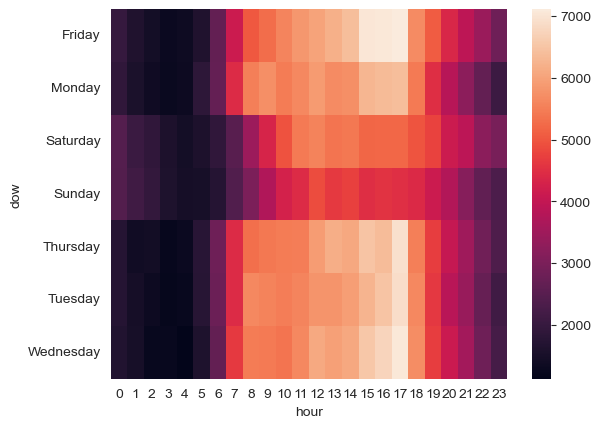

In [28]:
sns.heatmap(day_hour)

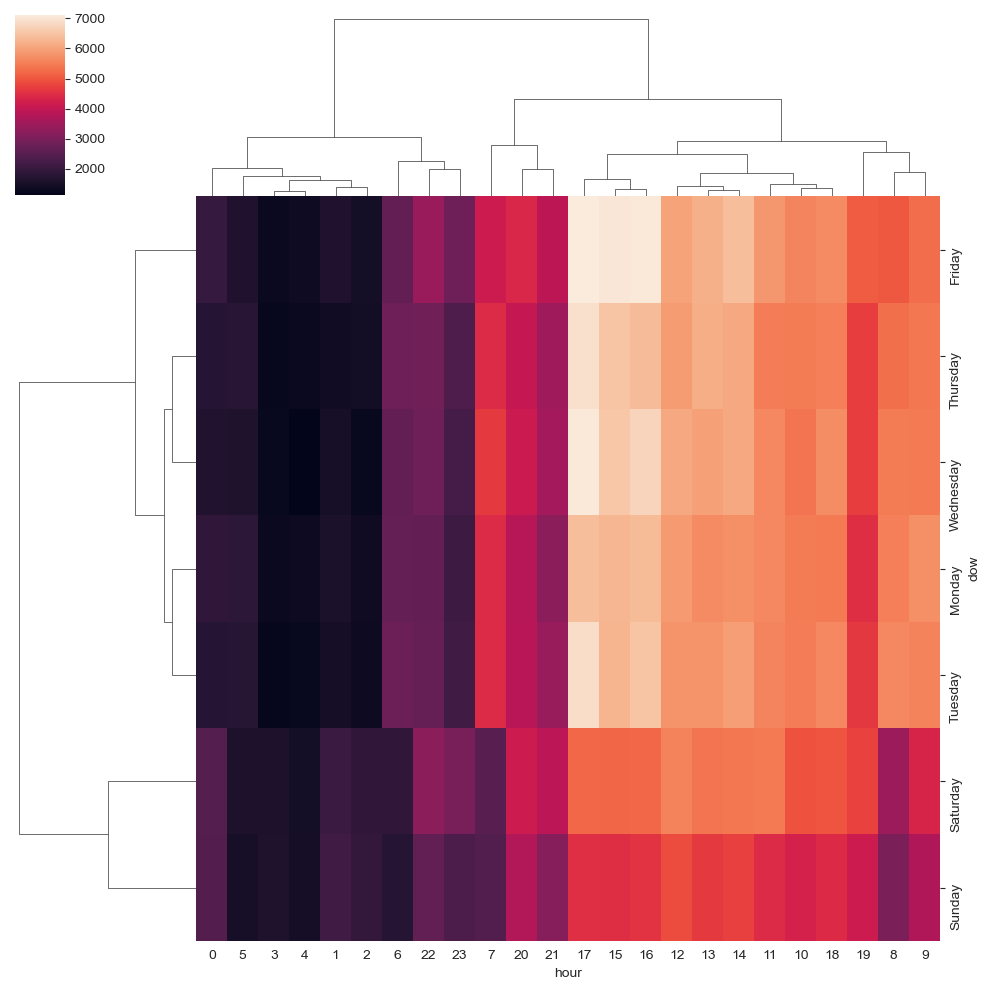

In [29]:
sns.clustermap(day_hour)

**Month vs DOW**

In [30]:
day_month=df.pivot_table(columns='month',index='dow',values='title',aggfunc='count')

<Axes: xlabel='month', ylabel='dow'>

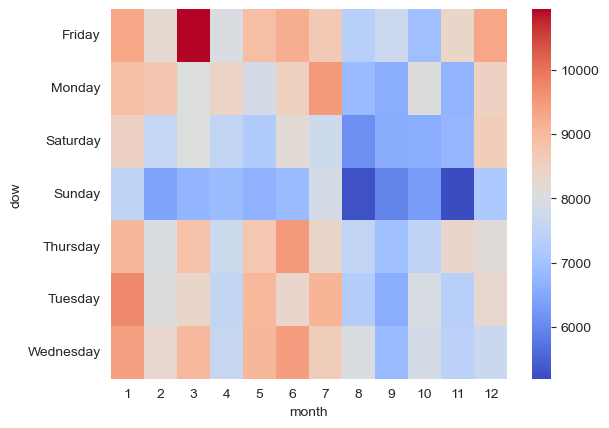

In [31]:
sns.heatmap(day_month,cmap='coolwarm')

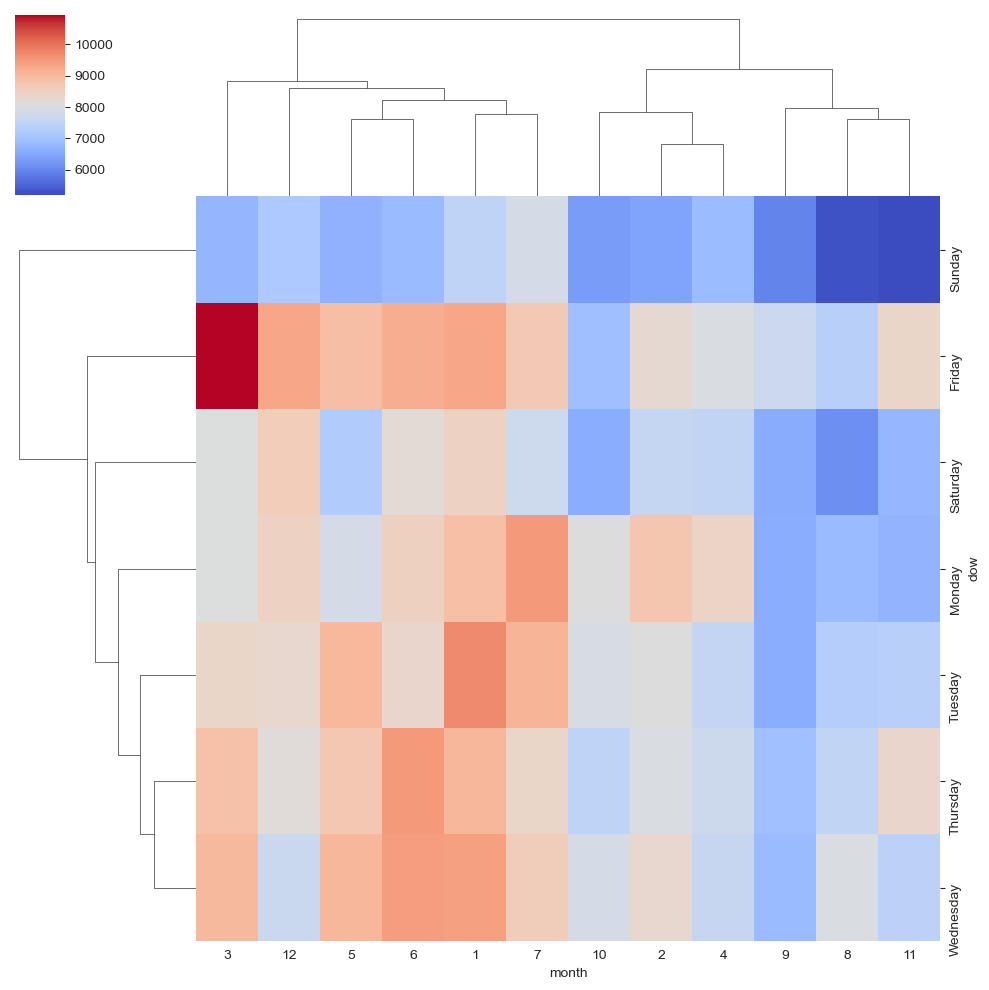

In [32]:
sns.clustermap(day_month,cmap='coolwarm')